In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
'''
Authors: 
Andrea Pimpinella <andrea.pimpinella@polimi.it>,
Alessandro E. C. Redondi <alessandroenrico.redondi@polimi.it>
Antonio Capone  <alessandroenrico.redondi@polimi.it>

This code preprocesses raw data for the analysis of Mobile Data measured at the access of a LTE NEtwork 
in the period 01-01-2020 / 31-03-2020
'''

'\nAuthors: \nAndrea Pimpinella <andrea.pimpinella@polimi.it>,\nAlessandro E. C. Redondi <alessandroenrico.redondi@polimi.it>\nAntonio Capone  <alessandroenrico.redondi@polimi.it>\n\nThis code preprocesses raw data for the analysis of Mobile Data measured at the access of a LTE NEtwork \nin the period 01-01-2020 / 31-03-2020\n'

# Import Data


In [3]:
# Use this Section to import the data files provided in the project folder.

# NETWORK KPI
# Location: Milan ; Reference month: either January, February or March 2020:

# PUT YOUR OWN FILE PATH!
file_path = ''

# KPIs
data = pd.read_csv(file_path+'Milano_800_January_MRN.csv') # Here January is selected
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Cells Location:
locations = pd.read_csv(file_path+'Coordinates_MILANO.csv')

# https://pandas.pydata.org

# This section shows some information regarding the dataset
print(20*'*')
print('Data types:\n')
print(data.dtypes)
print(20*'*')  
print('Number of data points: ', len(data))
print('Number of columns in the dataset: ', len(data.columns))
print(20*'*')
print(data.isnull().sum(axis=0)) # this command show the number of NON valid data points for each column of the dataset:
                                 # a KPI measure for some timestamp can get lost during the storing procedure
print(20*'*')




********************
Data types:

REGIONE                    object
COMUNE                     object
Date               datetime64[ns]
ECELL_ID                   object
DL_BW                     float64
RRC_S_SR                  float64
RRC_RE_SR                 float64
ERAB_S_SR                 float64
CS_SR                     float64
IntraF_Hout_SR            float64
InterF_Hout_SR            float64
Hin_SR                    float64
DL_VOL                    float64
UL_VOL                    float64
DL_THR_AVG                float64
UL_THR_AVG                float64
DL_THR_MAX                float64
UL_THR_MAX                float64
USERNUM_MAX               float64
PRB_DL_Used_Avg           float64
PRB_UL_Used_Avg           float64
dtype: object
********************
Number of data points:  284090
Number of columns in the dataset:  21
********************
REGIONE                0
COMUNE                 0
Date                   0
ECELL_ID               0
DL_BW                  0
RR

In [4]:
# Show first lines of Location Dataset
locations.drop_duplicates(subset='ECELL_ID').head()

,ENODEB_ID,ECELL_ID,LONG_X,LAT_Y
0,930b285c764e554f338f671864b30d3941935b00,b7de6cd46e855aaec8e28b26d1767e7a738819db,9.208433,45.445358
1,930b285c764e554f338f671864b30d3941935b00,3821116bcdc789c9d54369ddd58b8e75fafdcb59,9.208433,45.445358
2,930b285c764e554f338f671864b30d3941935b00,9ed9d0f30e21c0218c987496c433e11dd611c9d2,9.208433,45.445358
3,930b285c764e554f338f671864b30d3941935b00,9ba7c2a7f2ae3a32003cd92d0ce82fdd734f1d7f,9.208433,45.445358
4,930b285c764e554f338f671864b30d3941935b00,ce8ca39728288e4065ec86b14e902807327427ff,9.208433,45.445358


In [5]:
# Here you can understand the size of the scenario, 
# i.e., how many cells you are considering.
print('Number of (distinct) cells: ', len(data.drop_duplicates(subset='ECELL_ID')))


Number of (distinct) cells:  398


In [6]:
# Show first lines of KPIs Dataset

data.iloc[:,:5].head()

,REGIONE,COMUNE,Date,ECELL_ID,DL_BW
0,LOMBARDIA,MILANO,2020-01-01 19:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
1,LOMBARDIA,MILANO,2020-01-01 18:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
2,LOMBARDIA,MILANO,2020-01-01 17:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
3,LOMBARDIA,MILANO,2020-01-01 16:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
4,LOMBARDIA,MILANO,2020-01-01 15:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0


# Data Pre-Processing

In [7]:
# Usually, it is interesting to recognize weekly trends in access network related KPIs. 
# The idea is to compare, for the considered KPIs, a typical weekly trend (i.e. in our case, before Covid-19 outbreak) 
# with the one happening after the reference phenomenon (i.e., in our case, the Covid-19 outbreak).
# In this section, the period: Monday 13th - Sunday 20th January 2020
#is extracted from raw data, using as key for the dataset the field "Date":

# January
week = data[data['Date'] < pd.Timestamp(year=2020, month=1, day=20, hour = 0, minute =1)]
week = week[week['Date'] > pd.Timestamp(year=2020, month=1, day=12, hour = 23, minute =59)]

week.iloc[:,5:-2].head() # Here only 14 of the 16 KPIs are shown due to visualization space limits

,RRC_S_SR,RRC_RE_SR,ERAB_S_SR,CS_SR,IntraF_Hout_SR,InterF_Hout_SR,Hin_SR,DL_VOL,UL_VOL,DL_THR_AVG,UL_THR_AVG,DL_THR_MAX,UL_THR_MAX,USERNUM_MAX
288,99.982178,71.428571,99.943675,20098.0,100.000000,98.039216,99.296917,16315960.0,1801176.0,4461.75,466.75,54066.0,14467.0,0.0
289,99.920582,72.941176,99.958592,27179.0,97.802198,96.244784,100.000000,26234008.0,2869336.0,7194.00,744.50,56065.0,22918.0,0.0
290,99.856092,85.567010,99.968708,22086.0,100.000000,97.478992,100.000000,19980736.0,2411952.0,5462.50,629.25,50432.0,5110.0,0.0
291,99.919524,91.799544,99.915218,21857.0,100.000000,97.272727,100.000000,19699512.0,3276264.0,5389.75,864.75,85376.0,8679.0,0.0
292,99.848892,55.000000,99.913401,21141.0,100.000000,97.690941,100.000000,24225312.0,3523232.0,6638.00,930.00,67311.0,10119.0,0.0


In [8]:
# Typically, daily and night KPIs traces are analysed differently, as network users 
# show very different behaviours depending on the two moments. 
#In this section, the considered weekly data are grouped into Daily (from 6AM to 24 PM) 
# and Night (from 00 AM to 6 AM) Data

# January
week_day = week.set_index('Date').between_time('06:00:00', '23:59:59')
week_night = week.set_index('Date').between_time('00:00:00', '05:59:59')


In [9]:
# Raw data are provided as hourly samples, but it might be intereseting to consider also under-sampled 
# versions of the data. For instance, it is possible to resample the dataset to obtain daily aggregation of KPIs.
# E.g. in this section the KPI reporting the downloaded traffic volume ('DL_VOL') is considered
# for a particular cell ID ('360767189319c367c8a7b4cf84a32a7841b3678f') and related data are aggregated to produce
# Daily statistics:

cell_id = 'c945addeee641c3b7e7098fe8cad5defe032223c' # this is a city center cell
ref_KPI = 'DL_VOL' # KPI to analyse: DL_VOl is expressed in Kilobits

temp = week_day.loc[week_day['ECELL_ID']==cell_id,[ref_KPI]] # reference data

# Extract Statistics
median = temp.resample('D').agg({ref_KPI: np.median})
avg = temp.resample('D').agg({ref_KPI: np.mean})
std = temp.resample('D').agg({ref_KPI: np.std})

daily_stat = pd.DataFrame(index=median.index, columns = ['Median','Average','Standard_Deviaiton'])

daily_stat.Median = median.values
daily_stat.Average = avg.values
daily_stat.Standard_Deviaiton = std.values


daily_stat.head()

# For reference about pandas.DataFrame.resample method, please look at:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html


,Median,Average,Standard_Deviaiton
Date,,,
2020-01-13,16214972.0,1.509998e+07,1.070864e+07
2020-01-14,18374712.0,1.493930e+07,8.941285e+06
2020-01-15,15315368.0,1.324080e+07,8.384022e+06
2020-01-16,9518384.0,1.403120e+07,1.015525e+07
2020-01-17,14755860.0,1.364577e+07,1.030489e+07


# Data Visualization

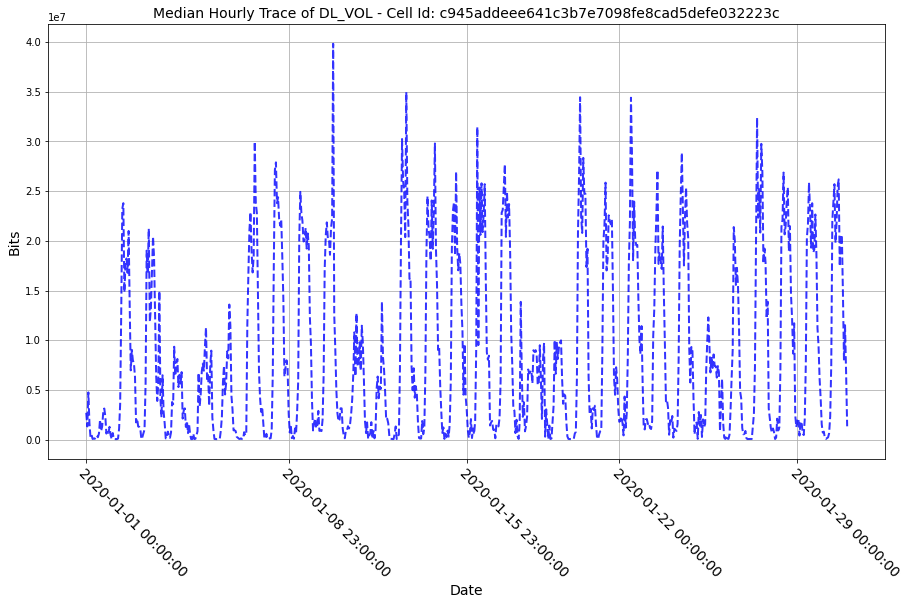

In [10]:
# This section plots the Traffic Downloaded from the considered cell in a month

# Sort hourly samples by date
ref = data.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))),ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.reset_index().set_index('Date').sort_values(by='Date').index
ticks = [0, 191, 359, 503, 671] # indexes of 00.00 timestamp of 1st, 8th, 15th, 22nd and 29th January
plt.xticks(ticks = ticks,labels = ticks_label[ticks],fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Date', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Median Hourly Trace of '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

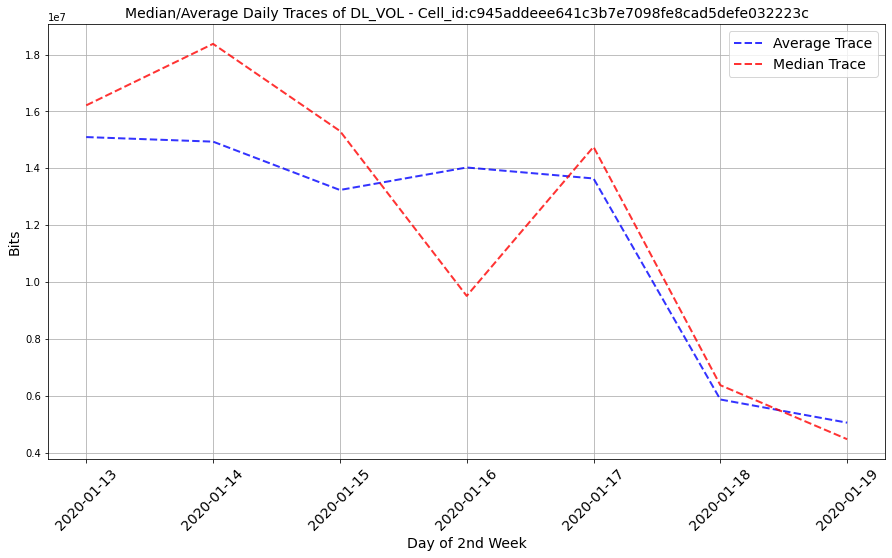

In [11]:
# This section plots the average/median daily data volume downloaded from the 
# cell taken as example in the period: Monday 13th - Sunday 20th January 2020 

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Average'], linestyle='--', lw=2, color='b',label='Average Trace', alpha=.8) 
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Median'], linestyle='--', lw=2, color='r',label='Median Trace', alpha=.8) 


# Set plotting option
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = range(1,len(daily_stat)+1) ,labels = list(daily_stat.index.date), fontsize = 14, rotation=45)
plt.xlabel('Day of 2nd Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.title('Median/Average Daily Traces of '+ref_KPI+' - Cell_id:%s'%cell_id, fontsize=14)
plt.show()

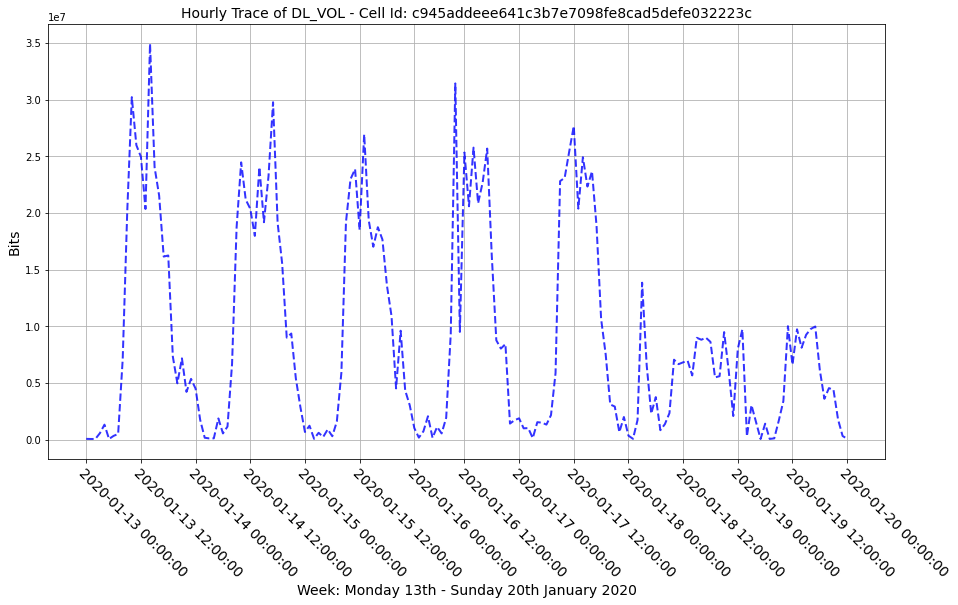

In [12]:
# This section plots the DL Traffic served by cell taken as example in the 
# period: Monday 13th - Sunday 20th January 2020 (not the MWS but just the 
# traffic observed during the selected week)

# Sort hourly samples by date
ref = week.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))),ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.reset_index().set_index('Date').sort_values(by='Date').index
ticks = [0, 12, 24, 36, 48, 60, 72, 83, 95, 107, 119, 131, 143, 155, 167] # indexes of 00.00 and 12.00 timestamps of each week day
plt.xticks(ticks = ticks,labels = ticks_label[ticks],fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Week: Monday 13th - Sunday 20th January 2020', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Hourly Trace of '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

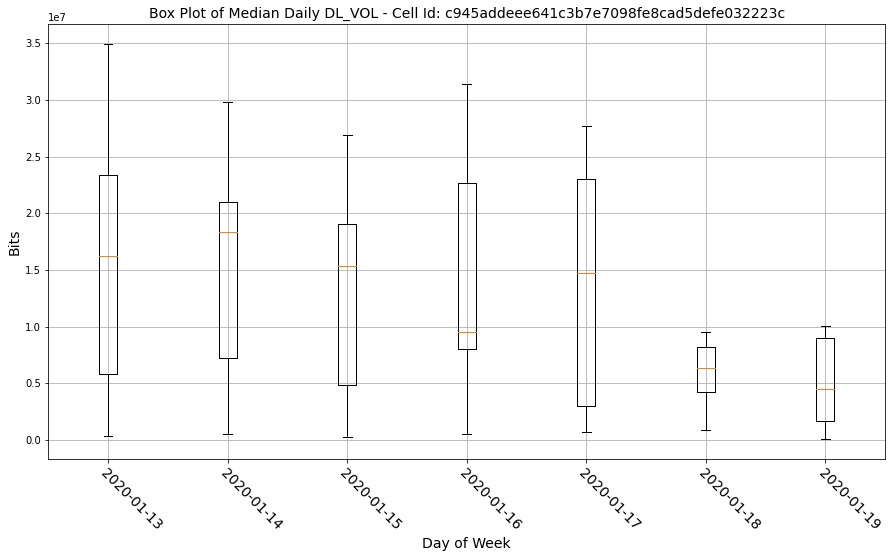

In [13]:
# This section makes a box plot of the daily statiscs regarding the number of connected 
# users to the cell taken as example. For each day, the following statistics are extracted from the considered
# KPI:
# - Median Value
# - 25th and 75th Quantiles
# - Max and Min values

# For reference about how to read a box plot go here: 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# Create temporary variables

ref = temp.reset_index()
days = list(np.unique(ref['Date'].dt.day))
xtick = list(range(len(days)))



# For each day of the week, make the box plot of the corresponding hourly trace
for day in days:
    
    series = ref[ref['Date'].dt.day == day]
    ax.boxplot(series[ref_KPI], positions = [xtick[days.index(day)]])

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = xtick,labels = list(np.unique(ref.set_index('Date').index.date)),fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Day of Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.title('Box Plot of Median Daily '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

